回归(regression)是一种监督算法

#### 线性回归的基本公式：
一元线性回归： $ y = \beta_0 + \beta_1x + \epsilon  $
$\epsilon 为误差项$
多元线性回归： $ y = \beta_0 +k_1x +k_2x +b $

#### 最小二乘法实现一元线性回归
基本公式：

In [6]:
import numpy as np

def least_squares_method(X, Y):
    # 计算系数beta1
    beta1 = np.sum((X - np.mean(X)) * (Y - np.mean(Y))) / np.sum((X - np.mean(X))**2)
    # 计算截距beta0
    beta0 = np.mean(Y) - beta1 * np.mean(X)

    # 计算误差平方和
    epsilon_list = 0.5 * (beta0 + beta1 * X - Y)**2
    epsilon = np.sum(epsilon_list)

    # 返回一个用于预测新x值的函数
    def f(x):
        return beta0 + beta1 * x

    return f, epsilon

# 示例数据
X = np.array([10, 15, 20, 30, 50, 60, 60, 70])
Y = np.array([0.8, 1, 1.8, 2, 3.2, 3, 3.1, 3.5])

func, theta = least_squares_method(X, Y)
print(f"价格为55时的预测值为: {func(55)}")
print(f"误差项为: {theta}")

价格为55时的预测值为: 2.976614881439084
误差项为: 0.2466475878986101


### 回归模型中的代价函数
 $$ J(\theta) = \sum_{m}^{i=1}(h_{\theta}(x^{(i)}) - y^{(i)}))^2 $$

In [ ]:
def LQM4matrix(X, Y):
    return 
    

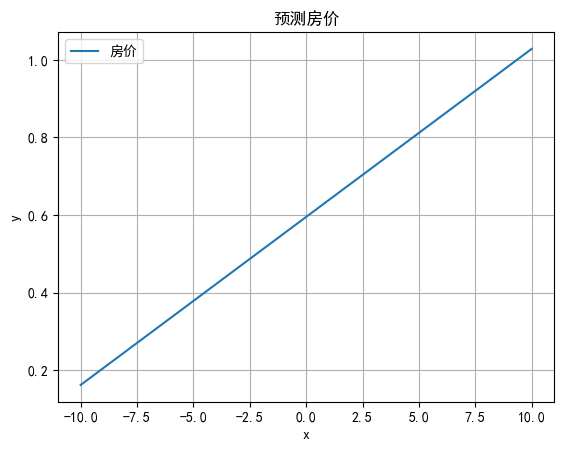

In [9]:
import matplotlib.pyplot as plt

"""设置字符集防止乱码问题"""
plt.rcParams['font.sans-serif'] = [u'simHei']
plt.rcParams['axes.unicode_minus'] = False


x = np.linspace(-10, 10, 400)  # 生成从-10到10的400个点
y = func(x)  # 计算对应的y值

# 绘制图形
plt.plot(x, y, label='房价')
plt.xlabel('x')
plt.ylabel('y')
plt.title('预测房价')
plt.legend()
plt.grid(True)
plt.show()

### 正则惩罚项
$$ \lambda\sum_n^{i=1}\theta_j   (\lambda > 0) $$

### ridge回归
$$ J(\theta) = \sum_{m}^{i=1}(h_{\theta}(x^{(i)}) - y^{(i)}))^2 + \lambda\sum_n^{i=1}\theta_j    (\lambda > 0) $$



### Elastic Net
$$ J(\theta) = \frac{1}{2}\sum_{m}^{i=1}(h_{\theta}(x^{(i)- y^{(i)}}))^2 + \lambda(p\sum_{n}^{j=1}|(\theta_j)| + (1-p)\sum_{n}^{j=1}\theta_{j}^{2}) $$

#### 梯度下降：优化算法
$$ \theta=\theta - \alpha \cdot \frac{\partial J(\theta)}{\partial\theta} $$

#### 随机梯度下降(SGD)
$$ \frac{\partial J(\theta)}{\theta_j} = (h_{\theta}(x) - y)x_j $$

$$ \theta_j = \theta_j + (\alpha(y^{(i)} - h_{\theta}(x^{(i)}) ))x_{j}^{(i)} $$


#### Logistic回归
$$ p = \frac{1}{1 + e^{-\theta^{\top}x}} $$

Sigmoid函数与其导数的特质：
$$ g'(z) = g(z) \cdot (1-g(z)) $$

#### Softmax回归

In [12]:
"""逻辑回归的示例，使用了乳腺癌威斯康星数据集"""
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

path = '线性回归学习资料/breast-cancer-wisconsin.data'
data = pd.read_csv(path, header=None)

# Setting column names based on common WBCD dataset descriptions
column_names = [
    "ID", "Clump Thickness", "Uniformity of Cell Size", "Uniformity of Cell Shape",
    "Marginal Adhesion", "Single Epithelial Cell Size", "Bare Nuclei",
    "Bland Chromatin", "Normal Nucleoli", "Mitoses", "Class"
]

data.columns = column_names

# Checking for missing values (often marked as '?')
data.replace('?', pd.NA, inplace=True)

# Convert 'Bare Nuclei' to numeric
data['Bare Nuclei'] = pd.to_numeric(data['Bare Nuclei'])

# Drop rows with any missing values
data.dropna(inplace=True)

# Convert 'Class' to binary (0 for benign (2), 1 for malignant (4))
data['Class'] = data['Class'].map({2: 0, 4: 1})


# Features and Labels
X = data.drop(['ID', 'Class'], axis=1)
y = data['Class']

# Splitting the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=42)

# Create an instance of Logistic Regression Classifier and fit the data.
logreg = LogisticRegression(max_iter=1000)
logreg.fit(X_train, y_train)

# Predicting the test set results
y_pred = logreg.predict(X_test)

# Calculating the accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy * 100:.2f}%")


Accuracy: 95.61%


In [17]:
"""softmax的应用实例，处理crx混合使用哑变量"""
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report
from sklearn.preprocessing import StandardScaler

# 加载数据
file_path = '线性回归学习资料/crx.data'
data = pd.read_csv(file_path, header=None)

# 替换 '?' 为 NaN
data.replace('?', pd.NA, inplace=True)

# 识别类别型特征
categorical_features = [col for col in data.columns if data[col].dtype == 'object']

# 创建哑变量
data_encoded = pd.get_dummies(data, columns=categorical_features, drop_first=True)

# 处理数值缺失值，使用中位数填充
for col in data_encoded.columns[data_encoded.isna().any()]:
    median_value = data_encoded[col].median()
    data_encoded[col].fillna(median_value, inplace=True)

# 确保所有特征列名都是字符串类型
data_encoded.columns = data_encoded.columns.astype(str)

# 划分特征和目标变量
X = data_encoded.drop(['15_-'], axis=1)
y = data_encoded['15_-']

# 划分训练集和测试集
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# 数据标准化
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# 初始化并训练softmax回归模型
model = LogisticRegression(max_iter=1000, multi_class='multinomial', solver='lbfgs')
model.fit(X_train_scaled, y_train)

# 在测试集上进行预测
y_pred = model.predict(X_test_scaled)

# 计算准确率和其他评估指标
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)

print("Accuracy:", accuracy)
print("Classification Report:\n", report)


Accuracy: 0.7922705314009661
Classification Report:
               precision    recall  f1-score   support

       False       0.79      0.76      0.77        97
        True       0.80      0.82      0.81       110

    accuracy                           0.79       207
   macro avg       0.79      0.79      0.79       207
weighted avg       0.79      0.79      0.79       207
